# KNN and SVM

# Step 1 - Data Ingestion

In [2]:
import pandas as pd
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

# Step 2 - Apply basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(1)

In [7]:
df = df.drop_duplicates(keep="first").reset_index(drop = True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Step 3 - Seperate X and Y(species)

In [9]:
X = df.drop(columns = ["species"])
Y = df["species"]

In [10]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
Y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

# Step 4 - Apply Train Test split

In [15]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.33, random_state=42)

In [16]:
xtrain.shape

(99, 4)

In [17]:
xtest.shape

(50, 4)

In [18]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
95,5.7,3.0,4.2,1.2
104,6.5,3.0,5.8,2.2
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
141,6.9,3.1,5.1,2.3


In [19]:
ytrain.head()

95     versicolor
104     virginica
66     versicolor
0          setosa
141     virginica
Name: species, dtype: object

In [20]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
117,7.7,3.8,6.7,2.2
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [21]:
ytest.head()

73     versicolor
18         setosa
117     virginica
78     versicolor
76     versicolor
Name: species, dtype: object

# KNN and SVM

In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [24]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [25]:
num_pipe.fit(xtrain)

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [26]:
xtrain_pre = num_pipe.transform(xtrain)
xtrain_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
95,-0.123796,0.017101,0.241765,-3.037022e-16
104,0.856669,0.017101,1.175802,1.367753e+00
66,-0.246354,0.017101,0.416897,4.103259e-01
0,-0.859145,1.226369,-1.392801,-1.367753e+00
141,1.346902,0.258954,0.767161,1.504528e+00


In [27]:
xtest_pre = num_pipe.transform(xtest)
xtest_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
73,0.366437,-0.466606,0.533652,-3.037022e-16
18,-0.123796,1.951930,-1.217669,-1.230978e+00
117,2.327367,1.951930,1.701199,1.367753e+00
78,0.243878,-0.224753,0.416897,4.103259e-01
76,1.224344,-0.466606,0.592029,2.735506e-01


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

params = {"n_neighbors": [2, 3, 4, 5, 6, 7]}
knn = KNeighborsClassifier()
rscv = RandomizedSearchCV(knn, params)
rscv.fit(xtrain_pre, ytrain)

c:\ML_Wakad_weekend_1130\.venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,estimator,KNeighborsClassifier()
,param_distributions,"{'n_neighbors': [2, 3, ...]}"
,n_iter,10
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [29]:
rscv.best_params_

{'n_neighbors': 3}

In [31]:
best_knn = rscv.best_estimator_
best_knn

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [32]:
best_knn.score(xtrain_pre, ytrain)

0.9292929292929293

In [33]:
best_knn.score(xtest_pre, ytest)

1.0

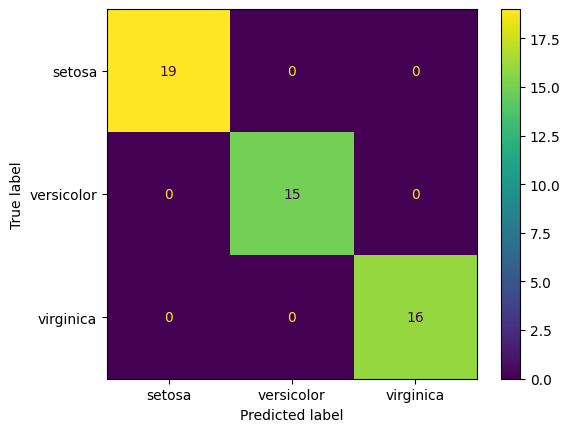

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_knn, xtest_pre, ytest)

In [37]:
from sklearn.metrics import classification_report
ypred_test = best_knn.predict(xtest_pre)
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



# Implent SVM

In [38]:
from sklearn.svm import SVC

svm = SVC(probability=True)
svm.fit(xtrain_pre, ytrain)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [39]:
svm.score(xtrain_pre, ytrain)

0.9595959595959596

In [40]:
svm.score(xtest_pre, ytest)

1.0

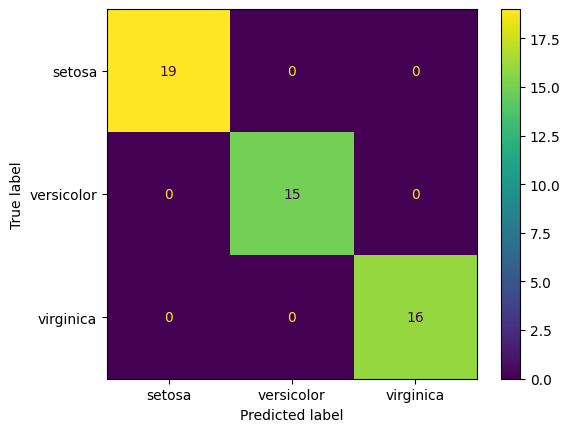

In [41]:
ConfusionMatrixDisplay.from_estimator(svm, xtest_pre, ytest)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



# Out of sample prediction

In [43]:
xnew = pd.read_csv("iris_sample.csv")
xnew.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8


In [44]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.368912,-1.192167,0.125010,0.136775
1,1.346902,0.258954,0.767161,1.504528
2,-0.859145,-1.192167,-0.458763,-0.136775
3,-1.717052,-0.224753,0.241765,-1.367753
4,0.121320,0.017101,0.767161,0.820652


In [45]:
xnew_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.368912,-1.192167,0.125010,0.136775
1,1.346902,0.258954,0.767161,1.504528
2,-0.859145,-1.192167,-0.458763,-0.136775
3,-1.717052,-0.224753,0.241765,-1.367753
4,0.121320,0.017101,0.767161,0.820652


In [46]:
preds = svm.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor'], dtype=object)

In [47]:
probs = svm.predict_proba(xnew_pre)
probs

array([[0.00777245, 0.97155503, 0.02067252],
       [0.01298949, 0.01689609, 0.97011441],
       [0.03291535, 0.95360192, 0.01348273],
       [0.54443573, 0.36637778, 0.08918649],
       [0.01257679, 0.21728358, 0.77013964],
       [0.96121325, 0.02282101, 0.01596574],
       [0.03658201, 0.95397995, 0.00943804],
       [0.00925145, 0.03013913, 0.96060942],
       [0.96749363, 0.01859792, 0.01390845],
       [0.77520987, 0.16643907, 0.05835106],
       [0.01231558, 0.98153342, 0.006151  ],
       [0.01291509, 0.98050319, 0.00658172],
       [0.02178914, 0.02212478, 0.95608608],
       [0.01916542, 0.7379479 , 0.24288669],
       [0.02094655, 0.53477242, 0.44428103]])

In [48]:
xnew["species"] = preds

In [51]:
xnew[svm.classes_] = probs.round(4)

In [52]:
xnew.to_csv("results.csv", index=False)